# Mobile Customer Churn

In this Portfolio task you will work with some (fake but realistic) data on Mobile Customer Churn.  Churn is where
a customer leaves the mobile provider.   The goal is to build a simple predictive model to predict churn from available features. 

The data was generated (by Hume Winzar at Macquarie) based on a real dataset provided by Optus.  The data is simulated but the column headings are the same. (Note that I'm not sure if all of the real relationships in this data are preserved so you need to be cautious in interpreting the results of your analysis here).  

The data is provided in file `MobileCustomerChurn.csv` and column headings are defined in a file `MobileChurnDataDictionary.csv` (store these in the `files` folder in your project).

Your high level goal in this notebook is to try to build and evaluate a __predictive model for churn__ - predict the value of the CHURN_IND field in the data from some of the other fields.  Note that the three `RECON` fields should not be used as they indicate whether the customer reconnected after having churned. 

__Note:__ you are not being evaluated on the _accuracy_ of the model but on the _process_ that you use to generate it.  You can use a simple model such as Logistic Regression for this task or try one of the more advanced methods covered in recent weeks.  Explore the data, build a model using a selection of features and then do some work on finding out which features provide the most accurate results.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

#### Read data and remove RECON columns, CUST_ID

In [2]:
churn = pd.read_csv("files/MobileCustomerChurn.csv", na_values=["NA", "#VALUE!"], index_col='INDEX')
churn = churn.iloc[:, :-3] #remove last 3 RECON columns
churn = churn.iloc[:,1:] #remove customer ID
churn.head()

,ACCOUNT_TENURE,ACCT_CNT_SERVICES,AGE,CFU,SERVICE_TENURE,PLAN_ACCESS_FEE,BYO_PLAN_STATUS,PLAN_TENURE,MONTHS_OF_CONTRACT_REMAINING,LAST_FX_CONTRACT_DURATION,CONTRACT_STATUS,PREV_CONTRACT_DURATION,HANDSET_USED_BRAND,CHURN_IND,MONTHLY_SPEND,COUNTRY_METRO_REGION,STATE
INDEX,,,,,,,,,,,,,,,,,
1,46,1,30.0,CONSUMER,46,54.54,NON BYO,15,0,24,OFF-CONTRACT,24,SAMSUNG,1,61.40,COUNTRY,WA
2,60,3,55.0,CONSUMER,59,54.54,NON BYO,5,0,24,OFF-CONTRACT,24,APPLE,1,54.54,METRO,NSW
3,65,1,29.0,CONSUMER,65,40.90,BYO,15,0,12,OFF-CONTRACT,12,APPLE,1,2.50,COUNTRY,WA
4,31,1,51.0,CONSUMER,31,31.81,NON BYO,31,0,24,OFF-CONTRACT,24,APPLE,1,6.48,COUNTRY,VIC
5,95,1,31.0,CONSUMER,95,54.54,NON BYO,0,0,24,OFF-CONTRACT,24,APPLE,1,100.22,METRO,NSW


#### Examine data

In [3]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46206 entries, 1 to 46206
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ACCOUNT_TENURE                46206 non-null  int64  
 1   ACCT_CNT_SERVICES             46206 non-null  int64  
 2   AGE                           46130 non-null  float64
 3   CFU                           46206 non-null  object 
 4   SERVICE_TENURE                46206 non-null  int64  
 5   PLAN_ACCESS_FEE               46206 non-null  float64
 6   BYO_PLAN_STATUS               46206 non-null  object 
 7   PLAN_TENURE                   46206 non-null  int64  
 8   MONTHS_OF_CONTRACT_REMAINING  46206 non-null  int64  
 9   LAST_FX_CONTRACT_DURATION     46206 non-null  int64  
 10  CONTRACT_STATUS               46206 non-null  object 
 11  PREV_CONTRACT_DURATION        46206 non-null  int64  
 12  HANDSET_USED_BRAND            46206 non-null  object 
 13  C

In [4]:
for col in churn:
    print(col, churn[col].unique())
    print('-'*80)

ACCOUNT_TENURE [ 46  60  65  31  95  62  90  12  13   9  47  24  49  75  33  10  25   4
  34  67  92  76  45  73  85  32  16   3  58  96  91  78  50  57  93  83
  30  94   8   7  23  89  80  27   0  97  63   6  69  64  87  54   1  51
  11  19  41  22  79  43  14   5  21   2  15  20  66  38  28  86  53  40
  71  84  42  55  48  81  36  26  39  88  44  61  17  59  82  99  29  98
  18  74  37  35  52  70  56  68  77  72 103 114 105 111 100 108 102 109
 107 110 104 116 101 119 112 115 106 118 113 120 117]
--------------------------------------------------------------------------------
ACCT_CNT_SERVICES [1 3 2 4]
--------------------------------------------------------------------------------
AGE [ 30.  55.  29.  51.  31.  25.  35.  66.  21.  41.  59.  22.  53.  47.
  50.  20.  48.  49.  26.  34.  68.  27.  56.  43.  44.  18.  60.  61.
  58.  23.  65.  33.  24.  45.  39.  64.  40.  19.  42.  52.  57.  54.
  46.  71.  32.  88.  79.  36.  72.  28.  62.  85.  70.  nan  69.  38.
  37.  77.  75.

In [5]:
churn.isna().sum()

ACCOUNT_TENURE                   0
ACCT_CNT_SERVICES                0
AGE                             76
CFU                              0
SERVICE_TENURE                   0
PLAN_ACCESS_FEE                  0
BYO_PLAN_STATUS                  0
PLAN_TENURE                      0
MONTHS_OF_CONTRACT_REMAINING     0
LAST_FX_CONTRACT_DURATION        0
CONTRACT_STATUS                  0
PREV_CONTRACT_DURATION           0
HANDSET_USED_BRAND               0
CHURN_IND                        0
MONTHLY_SPEND                    0
COUNTRY_METRO_REGION             1
STATE                            1
dtype: int64

In [6]:
churn.loc[churn.AGE.isna()]

,ACCOUNT_TENURE,ACCT_CNT_SERVICES,AGE,CFU,SERVICE_TENURE,PLAN_ACCESS_FEE,BYO_PLAN_STATUS,PLAN_TENURE,MONTHS_OF_CONTRACT_REMAINING,LAST_FX_CONTRACT_DURATION,CONTRACT_STATUS,PREV_CONTRACT_DURATION,HANDSET_USED_BRAND,CHURN_IND,MONTHLY_SPEND,COUNTRY_METRO_REGION,STATE
INDEX,,,,,,,,,,,,,,,,,
186,94,2,NaN,SMALL BUSINESS,94,45.44,NON BYO,27,0,24,OFF-CONTRACT,24,HUAWEI,1,51.79,COUNTRY,NSW
213,39,4,NaN,SMALL BUSINESS,1,36.36,NON BYO,1,0,0,NO-CONTRACT,0,SAMSUNG,1,48.37,METRO,NSW
2047,4,2,NaN,SMALL BUSINESS,4,72.72,NON BYO,4,20,24,ON-CONTRACT,0,SAMSUNG,1,72.72,METRO,ACT
2560,8,4,NaN,SMALL BUSINESS,8,27.27,BYO,5,0,0,NO-CONTRACT,0,APPLE,1,37.66,METRO,VIC
4129,9,3,NaN,SMALL BUSINESS,9,72.72,NON BYO,9,15,24,ON-CONTRACT,0,APPLE,1,72.72,METRO,NSW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41919,7,3,NaN,SMALL BUSINESS,5,27.27,BYO,5,0,0,NO-CONTRACT,0,SAMSUNG,1,72.56,METRO,VIC
42252,94,2,NaN,SMALL BUSINESS,16,54.54,NON BYO,0,24,24,ON-CONTRACT,0,APPLE,0,91.35,METRO,VIC
44004,0,1,NaN,SMALL BUSINESS,0,45.45,NON BYO,0,0,0,NO-CONTRACT,0,APPLE,0,45.45,METRO,WA


## Clean the data

In [7]:
churn_dummy = pd.get_dummies(churn)
churn_dummy.head()

,ACCOUNT_TENURE,ACCT_CNT_SERVICES,AGE,SERVICE_TENURE,PLAN_ACCESS_FEE,PLAN_TENURE,MONTHS_OF_CONTRACT_REMAINING,LAST_FX_CONTRACT_DURATION,PREV_CONTRACT_DURATION,CHURN_IND,...,COUNTRY_METRO_REGION_COUNTRY,COUNTRY_METRO_REGION_METRO,STATE_ACT,STATE_NSW,STATE_NT,STATE_QLD,STATE_SA,STATE_TAS,STATE_VIC,STATE_WA
INDEX,,,,,,,,,,,,,,,,,,,,,
1,46,1,30.0,46,54.54,15,0,24,24,1,...,1,0,0,0,0,0,0,0,0,1
2,60,3,55.0,59,54.54,5,0,24,24,1,...,0,1,0,1,0,0,0,0,0,0
3,65,1,29.0,65,40.90,15,0,12,12,1,...,1,0,0,0,0,0,0,0,0,1
4,31,1,51.0,31,31.81,31,0,24,24,1,...,1,0,0,0,0,0,0,0,1,0
5,95,1,31.0,95,54.54,0,0,24,24,1,...,0,1,0,1,0,0,0,0,0,0


In [8]:
with pd.option_context('display.max_columns', None): #force to display all data
    print(pd.get_dummies(churn))

       ACCOUNT_TENURE  ACCT_CNT_SERVICES   AGE  SERVICE_TENURE  \
INDEX                                                            
1                  46                  1  30.0              46   
2                  60                  3  55.0              59   
3                  65                  1  29.0              65   
4                  31                  1  51.0              31   
5                  95                  1  31.0              95   
...               ...                ...   ...             ...   
46202              10                  1  61.0               9   
46203               2                  1  53.0               2   
46204              47                  1  22.0              47   
46205              94                  1  40.0             182   
46206               0                  1  24.0               0   

       PLAN_ACCESS_FEE  PLAN_TENURE  MONTHS_OF_CONTRACT_REMAINING  \
INDEX                                                               
1  

In [9]:
churn_dummy.isna().sum()

ACCOUNT_TENURE                   0
ACCT_CNT_SERVICES                0
AGE                             76
SERVICE_TENURE                   0
PLAN_ACCESS_FEE                  0
PLAN_TENURE                      0
MONTHS_OF_CONTRACT_REMAINING     0
LAST_FX_CONTRACT_DURATION        0
PREV_CONTRACT_DURATION           0
CHURN_IND                        0
MONTHLY_SPEND                    0
CFU_CONSUMER                     0
CFU_SMALL BUSINESS               0
BYO_PLAN_STATUS_BYO              0
BYO_PLAN_STATUS_NON BYO          0
CONTRACT_STATUS_NO-CONTRACT      0
CONTRACT_STATUS_OFF-CONTRACT     0
CONTRACT_STATUS_ON-CONTRACT      0
HANDSET_USED_BRAND_APPLE         0
HANDSET_USED_BRAND_GOOGLE        0
HANDSET_USED_BRAND_HUAWEI        0
HANDSET_USED_BRAND_OTHER         0
HANDSET_USED_BRAND_SAMSUNG       0
HANDSET_USED_BRAND_UNKNOWN       0
COUNTRY_METRO_REGION_COUNTRY     0
COUNTRY_METRO_REGION_METRO       0
STATE_ACT                        0
STATE_NSW                        0
STATE_NT            

In [10]:
# Remove NAs
churn_dummy.dropna(inplace=True) 
churn_dummy.isna().sum() 

ACCOUNT_TENURE                  0
ACCT_CNT_SERVICES               0
AGE                             0
SERVICE_TENURE                  0
PLAN_ACCESS_FEE                 0
PLAN_TENURE                     0
MONTHS_OF_CONTRACT_REMAINING    0
LAST_FX_CONTRACT_DURATION       0
PREV_CONTRACT_DURATION          0
CHURN_IND                       0
MONTHLY_SPEND                   0
CFU_CONSUMER                    0
CFU_SMALL BUSINESS              0
BYO_PLAN_STATUS_BYO             0
BYO_PLAN_STATUS_NON BYO         0
CONTRACT_STATUS_NO-CONTRACT     0
CONTRACT_STATUS_OFF-CONTRACT    0
CONTRACT_STATUS_ON-CONTRACT     0
HANDSET_USED_BRAND_APPLE        0
HANDSET_USED_BRAND_GOOGLE       0
HANDSET_USED_BRAND_HUAWEI       0
HANDSET_USED_BRAND_OTHER        0
HANDSET_USED_BRAND_SAMSUNG      0
HANDSET_USED_BRAND_UNKNOWN      0
COUNTRY_METRO_REGION_COUNTRY    0
COUNTRY_METRO_REGION_METRO      0
STATE_ACT                       0
STATE_NSW                       0
STATE_NT                        0
STATE_QLD     

## Explore Data

Text(0.5, 1.0, 'Data Range')

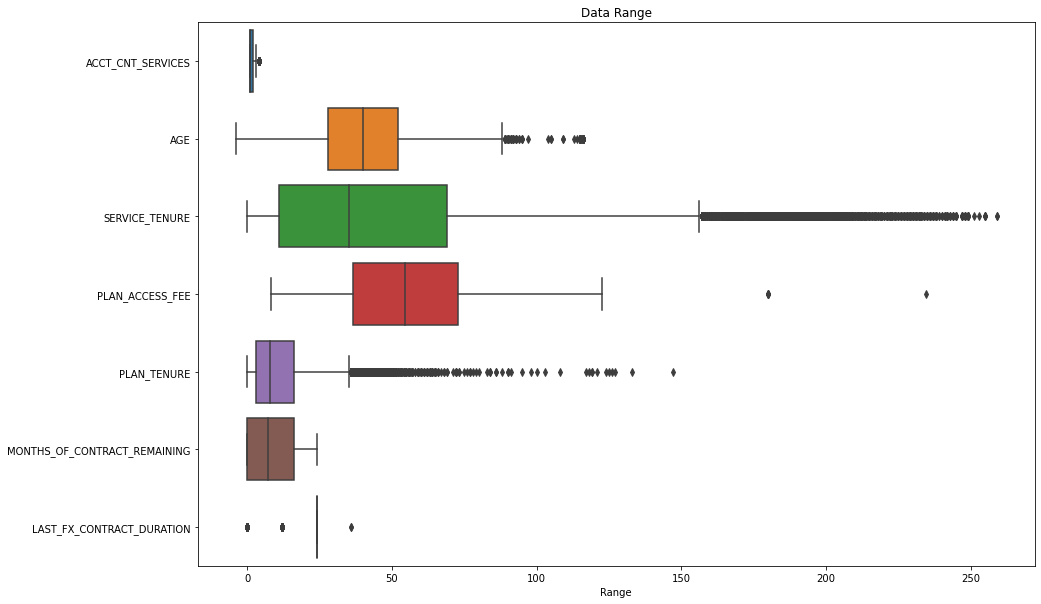

In [11]:
plt.figure(figsize=(15,10))
sns.boxplot(data=churn_dummy.iloc[:,1:8],orient='h')
plt.xlabel('Range')
plt.title('Data Range')

<AxesSubplot:>

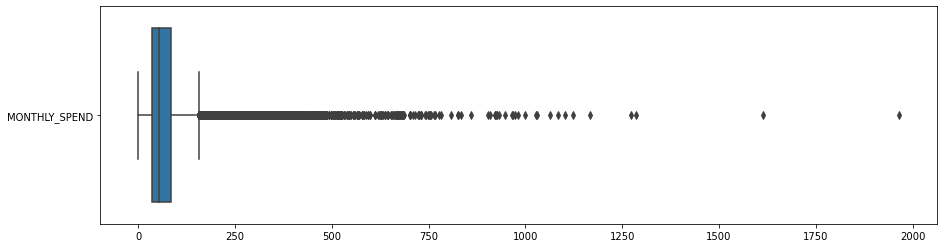

In [12]:
plt.figure(figsize=(15,4))
sns.boxplot(data=churn.iloc[:,14:15],orient='h')

The real outliers may be:
- Plan access fees more than \$160
- Monthly spend more than \$1500

In [13]:
# sns.pairplot(churn,hue='CHURN_IND',corner=True)

Text(0.5, 1.0, 'Correlation matrix')

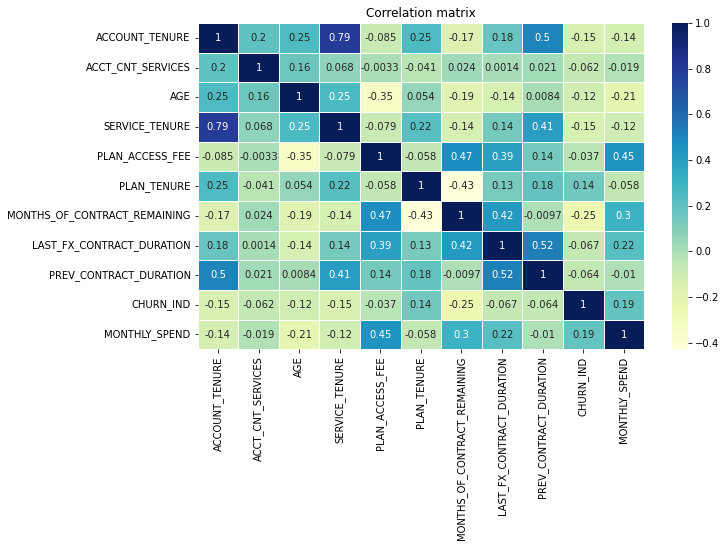

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(churn.corr(),linewidth=.5,annot=True,cmap='YlGnBu')
plt.title('Correlation matrix')

.79 is high. The model experiences multi-collinearity with these 2 variables and we need to drop one.

__Examine Service Tenure and Account Tenure in each state__

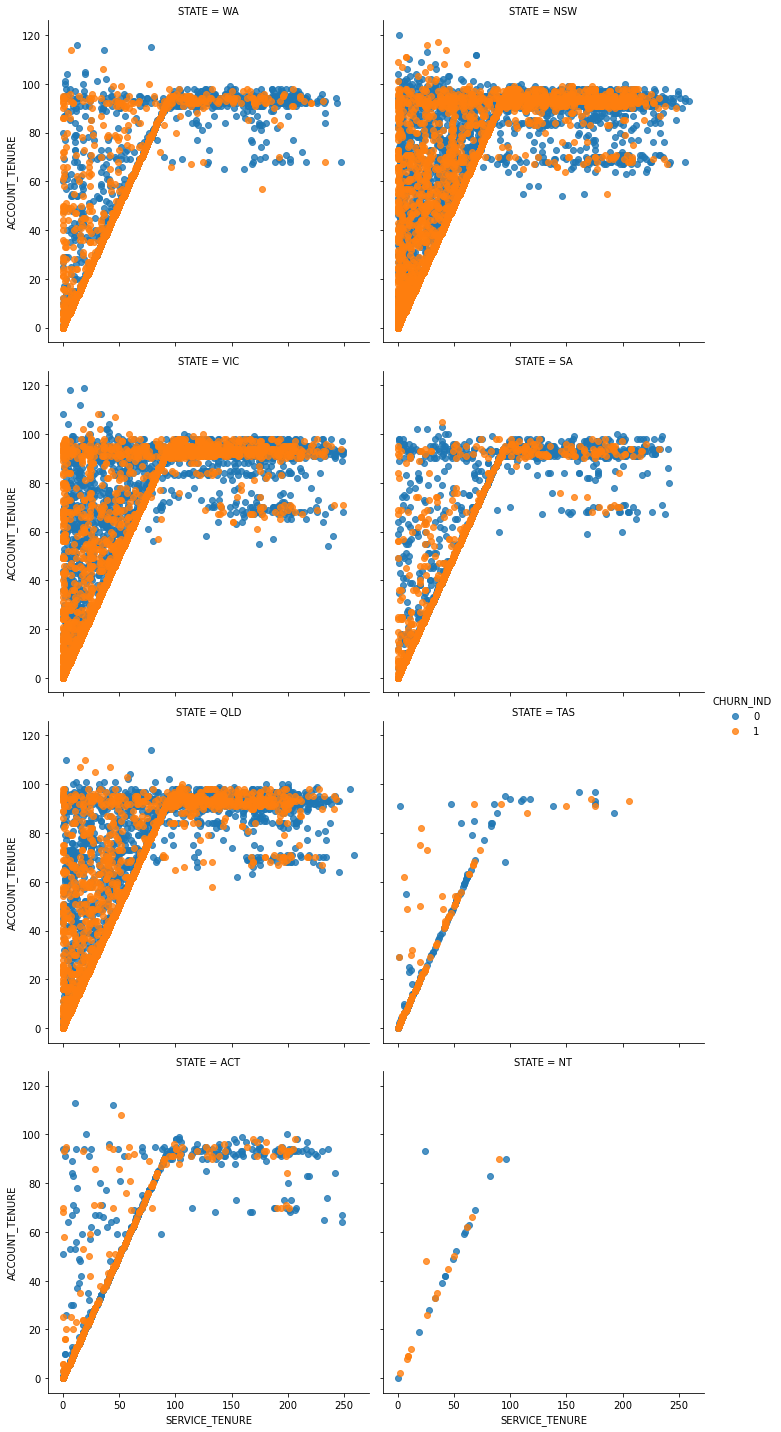

In [15]:
sns.lmplot(data=churn, x='SERVICE_TENURE', y='ACCOUNT_TENURE', hue='CHURN_IND', fit_reg=False, 
           col='STATE', col_wrap=2)

Service tenure is measured in months and is easier to interpret, compared to account tenure which is measured from the last day of the reporting month.

__Drop Account tenure__

In [16]:
churn_dummy.drop('ACCOUNT_TENURE',axis=1,inplace=True)

In [17]:
churn_dummy.head(1)

,ACCT_CNT_SERVICES,AGE,SERVICE_TENURE,PLAN_ACCESS_FEE,PLAN_TENURE,MONTHS_OF_CONTRACT_REMAINING,LAST_FX_CONTRACT_DURATION,PREV_CONTRACT_DURATION,CHURN_IND,MONTHLY_SPEND,...,COUNTRY_METRO_REGION_COUNTRY,COUNTRY_METRO_REGION_METRO,STATE_ACT,STATE_NSW,STATE_NT,STATE_QLD,STATE_SA,STATE_TAS,STATE_VIC,STATE_WA
INDEX,,,,,,,,,,,,,,,,,,,,,
1,1,30.0,46,54.54,15,0,24,24,1,61.4,...,1,0,0,0,0,0,0,0,0,1


__Examine other variables__

In [18]:
print('Examine distribution of:')
high_range = churn_dummy[churn_dummy > 10].notna().sum()>10
high_range = list(high_range[high_range==True].index)
high_range

Examine distribution of:


['AGE',
 'SERVICE_TENURE',
 'PLAN_ACCESS_FEE',
 'PLAN_TENURE',
 'MONTHS_OF_CONTRACT_REMAINING',
 'LAST_FX_CONTRACT_DURATION',
 'PREV_CONTRACT_DURATION',
 'MONTHLY_SPEND']

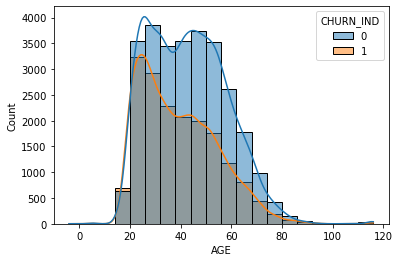

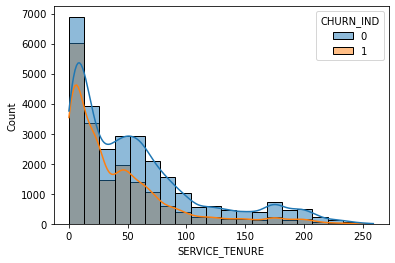

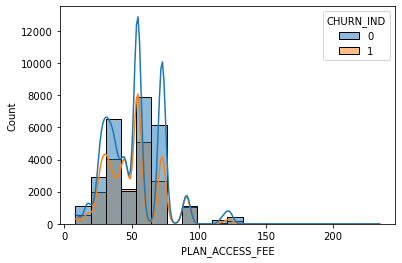

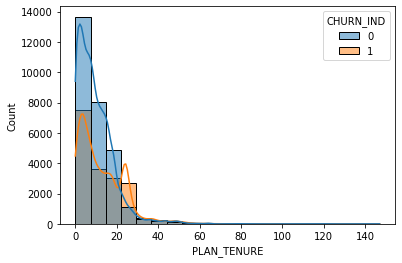

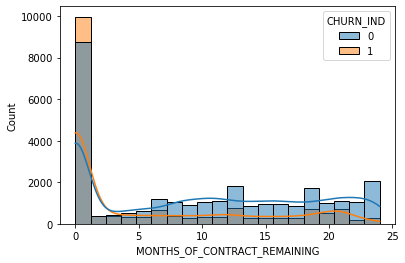

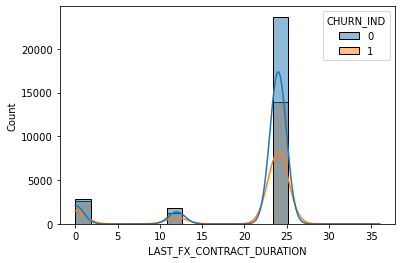

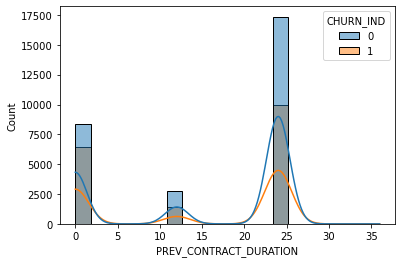

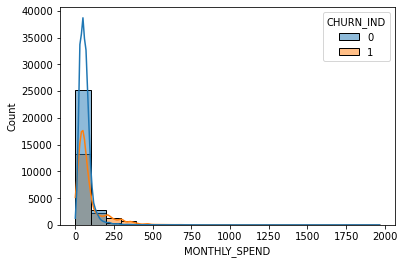

In [19]:
for i in high_range:
    plt.figure(i)
    sns.histplot(data=churn, x=i,kde=True,bins=20,hue='CHURN_IND',alpha=.5)

A lot of the data are not normal and vary a lot. It may make sense to normalise these before making a model. However, we'll compare the results with and without normalising the data.

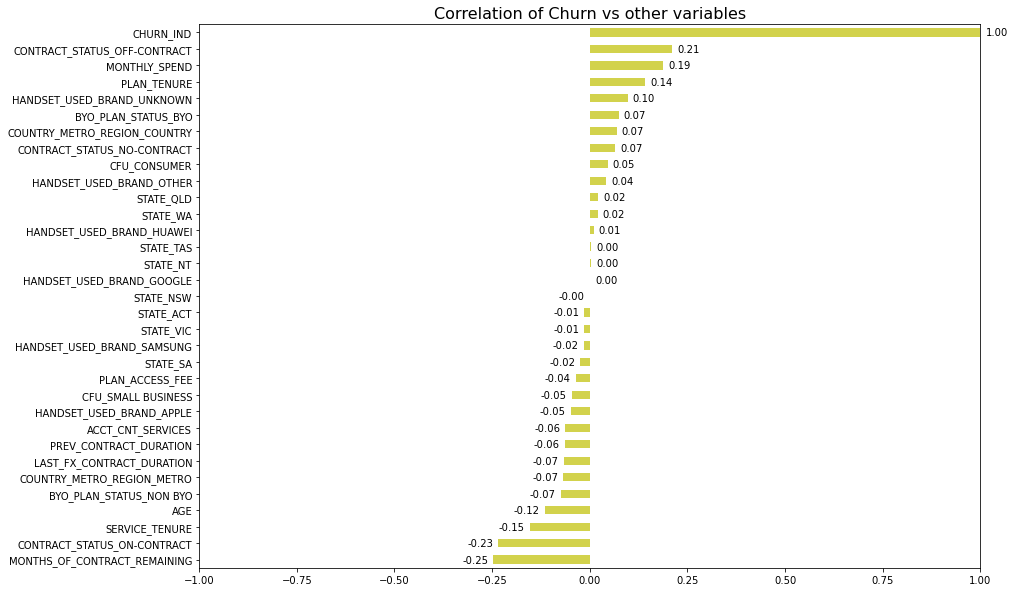

In [20]:
plt.figure(figsize=(14,10))
ax_corr = churn_dummy.corr()['CHURN_IND'].sort_values().plot(kind='barh',color='y',alpha=.7)
plt.title('Correlation of Churn vs other variables',fontsize=16)
ax_corr.bar_label(ax_corr.containers[0],fmt='%.2f', padding = 5)
plt.xlim(-1,1)
plt.show()

Among the least correlated with Churn are the Australian states and handset brand used. As these values are close to 0, we may need to exclude these from the model.

Another approach might be to remove correlations with +-0.05

## Modeling

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, plot_confusion_matrix, accuracy_score, mean_squared_error
from sklearn.feature_selection import RFE

# Data Scaling
from sklearn.preprocessing import MinMaxScaler

# Models
from sklearn.linear_model import LogisticRegression

In [22]:
df = churn_dummy.copy(deep=True)
df.head()

,ACCT_CNT_SERVICES,AGE,SERVICE_TENURE,PLAN_ACCESS_FEE,PLAN_TENURE,MONTHS_OF_CONTRACT_REMAINING,LAST_FX_CONTRACT_DURATION,PREV_CONTRACT_DURATION,CHURN_IND,MONTHLY_SPEND,...,COUNTRY_METRO_REGION_COUNTRY,COUNTRY_METRO_REGION_METRO,STATE_ACT,STATE_NSW,STATE_NT,STATE_QLD,STATE_SA,STATE_TAS,STATE_VIC,STATE_WA
INDEX,,,,,,,,,,,,,,,,,,,,,
1,1,30.0,46,54.54,15,0,24,24,1,61.40,...,1,0,0,0,0,0,0,0,0,1
2,3,55.0,59,54.54,5,0,24,24,1,54.54,...,0,1,0,1,0,0,0,0,0,0
3,1,29.0,65,40.90,15,0,12,12,1,2.50,...,1,0,0,0,0,0,0,0,0,1
4,1,51.0,31,31.81,31,0,24,24,1,6.48,...,1,0,0,0,0,0,0,0,1,0
5,1,31.0,95,54.54,0,0,24,24,1,100.22,...,0,1,0,1,0,0,0,0,0,0


### Logistic Regression

#### Base Model
MinMaxScale normalisation, no hyperparameter tuning, no feature selection

In [23]:
X = df.drop('CHURN_IND',axis=1)
y = df['CHURN_IND']

# Scale data to [0,1]
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X)) # turns columns into numbers
X.columns = features # bring back column names

In [24]:
# Split 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=100)

# Logistic Regression Model
logreg = LogisticRegression()
result = logreg.fit(X_train, y_train)

In [25]:
prediction_test = logreg.predict(X_test)

# Prediction accuracy
print('Prediction accuracy:',accuracy_score(y_test, prediction_test).round(4))

Prediction accuracy: 0.7257


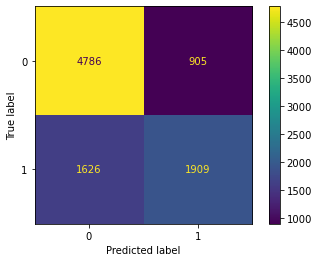

In [26]:
plot_confusion_matrix(logreg,X_test,y_test)

##### RFE

In [27]:
# creating RFE object
lr_model = LogisticRegression()
rfe = RFE(estimator=lr_model, n_features_to_select=5, step=1)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=5)

In [28]:
# doing evaluation
y_test_hat = rfe.predict(X_test)
print("accuracy score on test set: ", accuracy_score(y_test, y_test_hat).round(4))

accuracy score on test set:  0.7105


Create an array based on rank

In [29]:
# summarize all features

for i in range(0,X_train.shape[1]):
    print('Column: %d, Selected %s, Rank: %.1f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 18.0
Column: 1, Selected True, Rank: 1.0
Column: 2, Selected True, Rank: 1.0
Column: 3, Selected False, Rank: 3.0
Column: 4, Selected True, Rank: 1.0
Column: 5, Selected True, Rank: 1.0
Column: 6, Selected False, Rank: 6.0
Column: 7, Selected False, Rank: 7.0
Column: 8, Selected True, Rank: 1.0
Column: 9, Selected False, Rank: 15.0
Column: 10, Selected False, Rank: 24.0
Column: 11, Selected False, Rank: 10.0
Column: 12, Selected False, Rank: 4.0
Column: 13, Selected False, Rank: 12.0
Column: 14, Selected False, Rank: 11.0
Column: 15, Selected False, Rank: 2.0
Column: 16, Selected False, Rank: 16.0
Column: 17, Selected False, Rank: 19.0
Column: 18, Selected False, Rank: 20.0
Column: 19, Selected False, Rank: 8.0
Column: 20, Selected False, Rank: 21.0
Column: 21, Selected False, Rank: 5.0
Column: 22, Selected False, Rank: 9.0
Column: 23, Selected False, Rank: 26.0
Column: 24, Selected False, Rank: 13.0
Column: 25, Selected False, Rank: 25.0
Column: 26, Se

In [30]:
acc_scores = []
for i in range(1,X_train.shape[1]):
    clf = LogisticRegression()
    rfe = RFE(estimator=clf, n_features_to_select=i)
    # training model
    rfe.fit(X_train, y_train)
    # predicting on test set
    y_pred = rfe.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)
    # print this
    print("Acc on test set using", i, "features: ", acc_score)
    # append to the list
    acc_scores.append(acc_score)

Acc on test set using 1 features:  0.6629091697376978
Acc on test set using 2 features:  0.6969434207673965
Acc on test set using 3 features:  0.7033383915022762
Acc on test set using 4 features:  0.7049642315196185
Acc on test set using 5 features:  0.7104920875785823
Acc on test set using 6 features:  0.7175373943203989
Acc on test set using 7 features:  0.7165618903099935
Acc on test set using 8 features:  0.7265337090830263
Acc on test set using 9 features:  0.728484717103837
Acc on test set using 10 features:  0.728701495772816
Acc on test set using 11 features:  0.7272924344244527
Acc on test set using 12 features:  0.7281595491003685
Acc on test set using 13 features:  0.7263169304140472
Acc on test set using 14 features:  0.7263169304140472
Acc on test set using 15 features:  0.7257749837415999
Acc on test set using 16 features:  0.7255582050726208
Acc on test set using 17 features:  0.7257749837415999
Acc on test set using 18 features:  0.7255582050726208
Acc on test set using

Text(0.5, 1.0, 'Accuracy Scores')

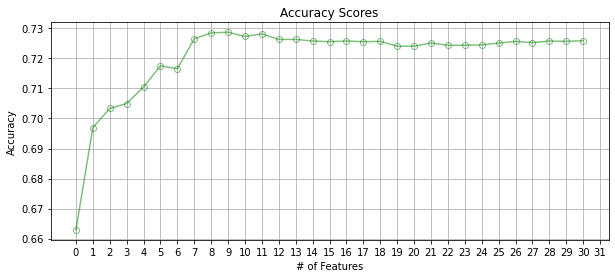

In [31]:
plt.figure(figsize=(10,4))
plt.plot(acc_scores, marker = 'o', color = 'g', alpha=.5,
         markeredgewidth = 1 ,markeredgecolor = 'g', markerfacecolor = 'None')
plt.xticks(np.arange(0, 32, step=1))
plt.grid()
plt.xlabel('# of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores')

It seems that 9 is the optimal number of features.

__Redo RFE, select top 9 features only__

In [32]:
lr_model2 = LogisticRegression()
rfe2 = RFE(estimator=lr_model2, n_features_to_select=9, step=1)
rfe2.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=9)

In [33]:
y_test_hat9 = rfe2.predict(X_test)
print("Accuracy score on test set with 9 features: ", accuracy_score(y_test, y_test_hat9).round(4))

Accuracy score on test set with 9 features:  0.7285


In [34]:
selected_cols_df = X_train.loc[:,rfe2.support_]
selected_features = selected_cols_df.columns
list(selected_features)

['AGE',
 'SERVICE_TENURE',
 'PLAN_ACCESS_FEE',
 'PLAN_TENURE',
 'MONTHS_OF_CONTRACT_REMAINING',
 'MONTHLY_SPEND',
 'BYO_PLAN_STATUS_NON BYO',
 'CONTRACT_STATUS_ON-CONTRACT',
 'HANDSET_USED_BRAND_UNKNOWN']

### Multinomial Naive Bayes

In [35]:
from sklearn.naive_bayes import MultinomialNB

clf_mnb = MultinomialNB()
clf_mnb.fit(X_train,y_train)
y_pred = clf_mnb.predict(X_test)
print('Accuracy is: %.4f\n' % accuracy_score(y_test, y_pred))

Accuracy is: 0.6483



__10-fold Cross Validation__

In [36]:
from sklearn.model_selection import cross_val_score, KFold

clf_mnb = MultinomialNB()
scores = cross_val_score(clf_mnb, X, y, scoring='accuracy', cv=KFold(n_splits=10, shuffle=True))

print('MultinomialNB mean accuracy score: %.4f' % scores.mean())
print('MultinomialNB stdev accuracy score: %.4f' % scores.std())

MultinomialNB mean accuracy score: 0.6383
MultinomialNB stdev accuracy score: 0.0104


__Multinomial Naive Bayes with just the top 9 features from Logistic Regression's RFE__

In [37]:
clf_mnb = MultinomialNB()
clf_mnb.fit(selected_cols_df, y_train)
y_pred = clf_mnb.predict(X_test.loc[:,rfe2.support_])
print('Accuracy is: %.4f\n' % accuracy_score(y_test, y_pred))

Accuracy is: 0.6254



# Conclusion

In [38]:
print('The top features predicting customer churn are the ff:')
for i in range(len(selected_features)):
    print('%d.' %(i+1), selected_features.str.title()[i])
print('\n With a final accuracy score of %.4f' % accuracy_score(y_test, y_test_hat9))

The top features predicting customer churn are the ff:
1. Age
2. Service_Tenure
3. Plan_Access_Fee
4. Plan_Tenure
5. Months_Of_Contract_Remaining
6. Monthly_Spend
7. Byo_Plan_Status_Non Byo
8. Contract_Status_On-Contract
9. Handset_Used_Brand_Unknown

 With a final accuracy score of 0.7285


In this dataset, Logistic Regression performed better than a Multinomial Naive Bayes model, with the former performing around several percentage points better than the other.